In [72]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

## Load data

In [77]:
# adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.h5ad')
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.AuthorAnnot.MSI_score_labeled.h5ad')

In [4]:
chen_patient_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.patient_meta.csv',)
chen_patient_metadata = chen_patient_metadata[(chen_patient_metadata['Cancer Type'] == 'CRC') & 
                                            (chen_patient_metadata['MSI/MSS']=='MSI') & 
                                            (chen_patient_metadata['Response']!='SD') & 
                                            ~(chen_patient_metadata['Patient ID'].isin(['P08', 'P12']))].reset_index(drop=True)

In [5]:
# dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
# dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
# dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

# dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
# dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
# dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

# dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

# for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
# for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
# for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

# for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
# for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
# for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

# lvl1_celltype = list()
# lvl2_celltype = list()

# for tup in adata_chen.obs.itertuples():
#     if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
#         lvl1_celltype.append('Epithelial')
#         lvl2_celltype.append('Tumor epithelial')
#     elif tup.Manual_CellType_lvl_1 == 'Normal epithelial':
#         lvl1_celltype.append('Epithelial')
#         lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])
#     else:
#         lvl1_celltype.append(dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier])
#         lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])
    
# adata_chen.obs['Manual_CellType_lvl_1'] = lvl1_celltype
# adata_chen.obs['Manual_CellType_lvl_2'] = lvl2_celltype

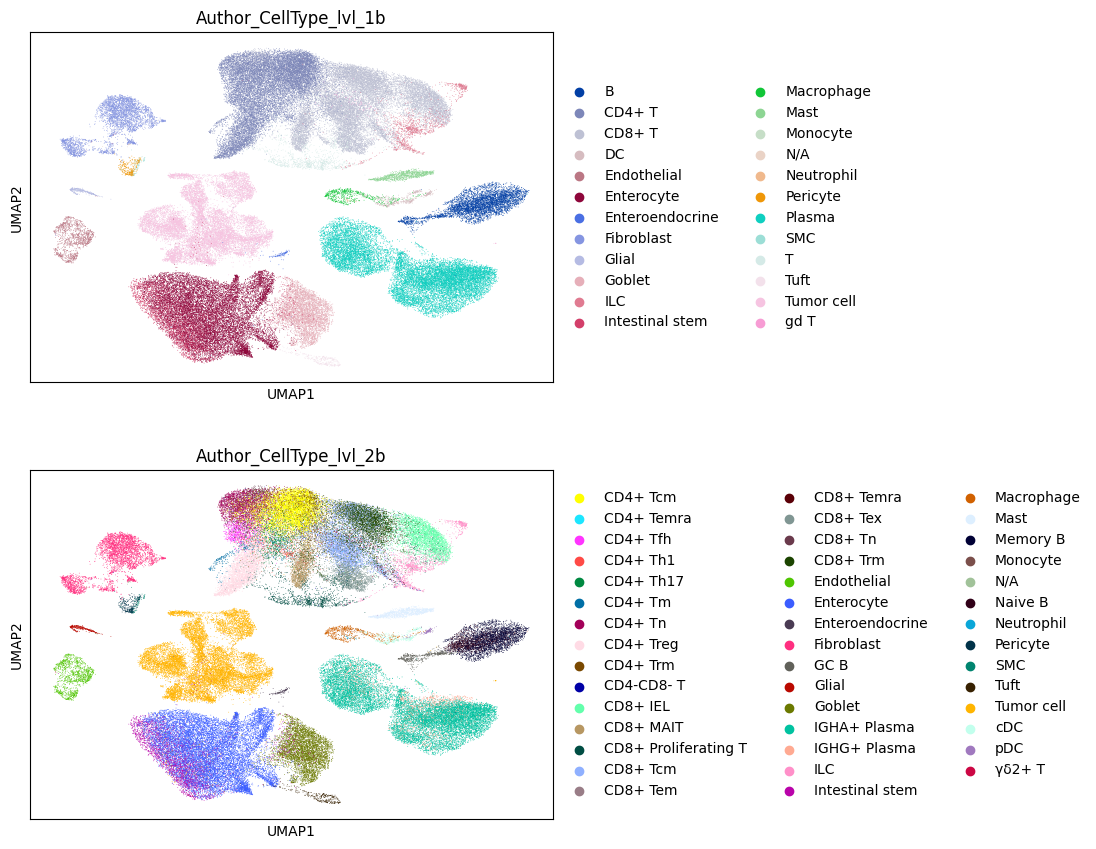

In [78]:
sc.pl.umap(adata_chen, color=['Author_CellType_lvl_1b', 'Author_CellType_lvl_2b'], ncols=1)

In [ ]:
# # Manual_CellType_lvl_1
# Chen_exclusive_lvl_2_CellTypes = {
#     # Simple name change
#     'BEST4+ Enterocytes' : 'Enterocytes',
#     'Intestinal stem' : 'Intestinal stem cell', 
#     'Tumor epithelial' : 'Tumor cell',
#     'SOX6+ Fibroblast' : 'Fibroblast',

    
#     # Exclusive cell types
#     'CCL21+ Fibroblast' : 'Fibroblast',
#     'CXCL12- Fibroblast' : 'Fibroblast',
#     'Enterocyte progenitors' : 'Enterocytes',
#     'Enteroendocrine' : 'N/A',  #!
#     'TXNIP-high Endothelial' : 'Endothelial',
#     'TXNIP-low Endothelial' : 'Endothelial',
#     'Tuft'  : 'N/A',            #!
#     # 'Vδ3+ T' : 'Vδ3+ T',
#     'Vδ1+ T' : 'gd T',
#     'Vδ2+ T' : 'gd T',
#     'Vδ3+ T' : 'gd T',

# }

# dict_Identifier_to_lvl_3_CellType = dict()
# for tup in adata_chen.obs.itertuples():
#     try:
#         dict_Identifier_to_lvl_3_CellType[tup.Identifier] = Chen_exclusive_lvl_2_CellTypes[tup.Manual_CellType_lvl_2]
#     except KeyError:
#         dict_Identifier_to_lvl_3_CellType[tup.Identifier] = tup.Manual_CellType_lvl_2
# adata_chen.obs['Manual_CellType_lvl_3'] = [ dict_Identifier_to_lvl_3_CellType[Identifier] for Identifier in adata_chen.obs['Identifier'] ]

# sc.pl.umap(adata_chen, color=['Manual_CellType_lvl_3'])
# adata_chen.write('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.MSI_score_labeled.lvl3.h5ad')

## Association of each TME cell type to MSI intensity

### Calculate sample enrichment

In [87]:
CellTypeProportionByPatient = list()

for PatientID, edf in adata_chen[~(adata_chen.obs['Author_CellType_lvl_1b'].isin(['Tumor cell', 'Enterocyte', 'Enteroendocrine', 'Intestinal stem', 'Goblet', 'Tuft', 'N/A'])) & 
                                 (adata_chen.obs['MSI']=='MSI')].obs.groupby('PatientID', observed=True,):
    for BiopsySite, edf2 in edf.groupby("BiopsySite", observed=True):
        for CellType, edf3 in edf2.groupby('Author_CellType_lvl_2b', observed=True,):    #! Author_CellType_lvl_2    Manual_CellType_lvl_3 
            CellTypeProportionByPatient.append( [PatientID, edf.iloc[0].MSI, BiopsySite, CellType, len(edf3), len(edf3)/len(edf2) ] )
            
CellTypeProportionByPatient = pd.DataFrame(CellTypeProportionByPatient, columns=['PatientID', 'MSI',  'BiopsySite', 'CellType', 'Count', 'Proportion'])
CellTypeProportionByPatient.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/4_TME/CellTypeProportion.tsv', sep='\t', index=False)

In [88]:
set(CellTypeProportionByPatient['CellType'])

{'CD4+ Tcm',
 'CD4+ Temra',
 'CD4+ Tfh',
 'CD4+ Th1',
 'CD4+ Th17',
 'CD4+ Tm',
 'CD4+ Tn',
 'CD4+ Treg',
 'CD4+ Trm',
 'CD4-CD8- T',
 'CD8+ IEL',
 'CD8+ MAIT',
 'CD8+ Proliferating T',
 'CD8+ Tcm',
 'CD8+ Tem',
 'CD8+ Temra',
 'CD8+ Tex',
 'CD8+ Tn',
 'CD8+ Trm',
 'Endothelial',
 'Fibroblast',
 'GC B',
 'Glial',
 'IGHA+ Plasma',
 'IGHG+ Plasma',
 'ILC',
 'Macrophage',
 'Mast',
 'Memory B',
 'Monocyte',
 'Naive B',
 'Neutrophil',
 'Pericyte',
 'SMC',
 'cDC',
 'pDC',
 'γδ2+ T'}

In [97]:
sum(CellTypeProportionByPatient[(CellTypeProportionByPatient['BiopsySite']=='Tumor') & 
                                (CellTypeProportionByPatient['PatientID']=='P18')]['Proportion'])

1.0

In [11]:
def calcSampleEnrichment( T_Proportion, N_Proportion, epsilon=(0.1)**6 ):
    return np.log2( (T_Proportion+epsilon)/(N_Proportion+epsilon) )

In [32]:
SampleEnrichmentByCellType = list()
T_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor']['Count'])
N_totalCellCount = sum(CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Normal']['Count'])
print(T_totalCellCount, N_totalCellCount)
dict_BiopsySite_to_TotalCount = { 'Tumor' : T_totalCellCount,'Normal' : N_totalCellCount }

for CellType, edf in CellTypeProportionByPatient.groupby('CellType'):
    # dict_BiopsySite_to_Proportion = { tup.BiopsySite : tup.Proportion for tup in edf.itertuples() }
    dict_BiopsySite_to_Proportion = { BiopsySite : sum(edf2['Count'])/dict_BiopsySite_to_TotalCount[BiopsySite] for BiopsySite, edf2 in edf.groupby('BiopsySite') }
    if 'Tumor' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Tumor'] = 0 
    if 'Normal' not in list(dict_BiopsySite_to_Proportion.keys()): dict_BiopsySite_to_Proportion['Normal'] = 0 

    SampleEnrichmentByCellType.append( [CellType, calcSampleEnrichment(dict_BiopsySite_to_Proportion['Tumor'], dict_BiopsySite_to_Proportion['Normal'])] )
SampleEnrichmentByCellType = pd.DataFrame(SampleEnrichmentByCellType, columns=['CellType', 'Enrichment'])

26364 36355


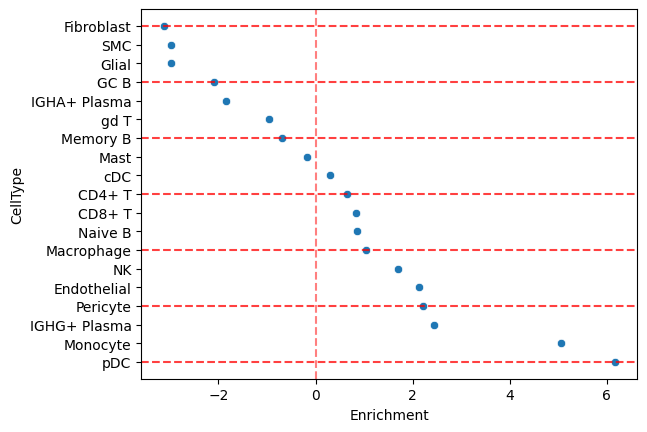

In [33]:
sns.scatterplot(data=SampleEnrichmentByCellType.sort_values('Enrichment'), y='CellType', x='Enrichment')
plt.axvline(0, color='r', ls='--', alpha=0.5,)
for i in range(0, len(SampleEnrichmentByCellType), 3):
    plt.axhline(i, color='r', ls='--', alpha=0.75)

### Calculate association between proportion and MSI intensity

In [42]:
list_PatientID = list(set(adata_chen.obs['PatientID']))
dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_chen.obs.groupby('PatientID', ) } 
AssociationWithMSIByCellType = list()

for CellType, edf in CellTypeProportionByPatient[CellTypeProportionByPatient['BiopsySite']=='Tumor'].groupby('CellType', observed=True,):
    dict_PatientID_to_Proportion = { tup.PatientID : tup.Proportion for tup in edf.itertuples() }
    # if len(edf) != len(list_PatientID): 
    #     print(CellType)
    #     continue
    c = 0
    for PatientID in list_PatientID:
        try: dict_PatientID_to_Proportion[PatientID]
        except KeyError: 
            c += 1
            dict_PatientID_to_Proportion[PatientID] = 0
            

    x, y = [ dict_PatientID_to_Proportion[p] for p in list_PatientID ], [ dict_PatientID_to_MSI_intensity[p] for p in list_PatientID ]
    r, pval = scipy.stats.spearmanr( x, y, )
    AssociationWithMSIByCellType.append( [CellType, r, pval, len(list_PatientID)-c] )

AssociationWithMSIByCellType = pd.DataFrame(AssociationWithMSIByCellType, columns=['CellType', 'R', 'pval', 'n_patients'])

/tmp/ipykernel_185189/418318688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_MSI_intensity = { PatientID : np.mean(edf[(edf['Manual_CellType_lvl_2']=='Tumor epithelial')]['MSI_score']) for PatientID, edf in adata_chen.obs.groupby('PatientID', ) }


In [51]:
CellTypeProportionByPatient['MSI_score'] = [ dict_PatientID_to_MSI_intensity[PatientID] for PatientID in CellTypeProportionByPatient['PatientID'] ]

In [59]:
adata_chen.obs[(adata_chen.obs['PatientID']=='P18') & (adata_chen.obs['BiopsySite']=='Tumor')]

,doublet_score,predicted_doublet,SampleID,PatientID,BiopsySite,Accession,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,...,AvgSTRDiff,StdSTRDiff,NumSTRLoci,MSI,Response,Manual_CellType_lvl_1,MSI_score,MSI_score_z,Manual_CellType_lvl_2,Manual_CellType_lvl_3
AAACCTGGTATGAATG-1,0.079821,False,P18-T-I,P18,Tumor,HRR1373580,4963,8.509967,21504.0,9.976041,...,-0.644156,1.858815,385,MSI,CR,Epithelial,1.197367,0.468457,Tumor epithelial,Tumor cell
AAACCTGTCGAGAGCA-1-1,0.012658,False,P18-T-I,P18,Tumor,HRR1373580,2084,7.642524,5062.0,8.529715,...,0.172414,0.985025,29,MSI,CR,T,-0.169832,-0.386464,CD4+ T,CD4+ T
AAACGGGAGACCTAGG-1,0.029328,False,P18-T-I,P18,Tumor,HRR1373580,3505,8.162231,15092.0,9.621986,...,-0.500000,1.802776,100,MSI,CR,Epithelial,0.901388,0.283379,Tumor epithelial,Tumor cell
AAACGGGAGAGACTTA-1,0.024793,False,P18-T-I,P18,Tumor,HRR1373580,2955,7.991592,16396.0,9.704854,...,-0.681159,1.974422,69,MSI,CR,Epithelial,1.344896,0.560708,Tumor epithelial,Tumor cell
AAACGGGAGAGTGACC-1,0.041284,False,P18-T-I,P18,Tumor,HRR1373580,2606,7.865955,11775.0,9.373819,...,-0.392157,1.284576,51,MSI,CR,Epithelial,0.503755,0.034736,Tumor epithelial,Tumor cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAATAGCA-1,0.027422,False,P18-T-I,P18,Tumor,HRR1373580,4112,8.321908,10947.0,9.300912,...,-0.778008,2.035600,482,MSI,CR,Epithelial,1.583713,0.710043,Tumor epithelial,Tumor cell
TTTGTCAGTAGAGGAA-1-1,0.029328,False,P18-T-I,P18,Tumor,HRR1373580,4528,8.418256,11009.0,9.306560,...,-0.495652,1.967448,575,MSI,CR,Epithelial,0.975170,0.329515,Tumor epithelial,Tumor cell
TTTGTCAGTGAAGGCT-1,0.034733,False,P18-T-I,P18,Tumor,HRR1373580,3189,8.067776,6507.0,8.780787,...,-0.732919,1.857527,322,MSI,CR,Epithelial,1.361417,0.571039,Tumor epithelial,Tumor cell
TTTGTCAGTGCCTGCA-1,0.073171,False,P18-T-I,P18,Tumor,HRR1373580,2419,7.791523,10736.0,9.281451,...,0.300000,1.741328,90,MSI,CR,Dendritic,-0.522398,-0.606927,cDC,cDC


In [60]:
211/2650

0.07962264150943396

In [52]:
CellTypeProportionByPatient[(CellTypeProportionByPatient['BiopsySite']=='Tumor') & (CellTypeProportionByPatient['CellType']=='CD8+ T')].sort_values('MSI_score')

,PatientID,MSI,BiopsySite,CellType,Count,Proportion,MSI_score
120,P18,MSI,Tumor,CD8+ T,211,0.336523,1.259768
88,P17,MSI,Tumor,CD8+ T,194,0.274788,2.163173
315,P26,MSI,Tumor,CD8+ T,1267,0.407658,3.252726
53,P15,MSI,Tumor,CD8+ T,1504,0.290965,3.280024
181,P20,MSI,Tumor,CD8+ T,1330,0.399160,3.320251
151,P19,MSI,Tumor,CD8+ T,276,0.272727,3.424762
249,P22,MSI,Tumor,CD8+ T,627,0.173109,4.473529
286,P23,MSI,Tumor,CD8+ T,317,0.188578,4.818777
215,P21,MSI,Tumor,CD8+ T,1096,0.449733,5.228585
19,P04,MSI,Tumor,CD8+ T,1790,0.383298,6.600170


In [43]:
dict_CellType_to_SummarizedInfo = dict()
for tup in SampleEnrichmentByCellType[SampleEnrichmentByCellType['CellType'].isin( AssociationWithMSIByCellType['CellType'] )].itertuples():
    dict_CellType_to_SummarizedInfo[tup.CellType] = [tup.Enrichment] 
for tup in AssociationWithMSIByCellType[AssociationWithMSIByCellType['CellType'].isin( SampleEnrichmentByCellType['CellType'] )].itertuples():
    dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.R )
    dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.pval )
    dict_CellType_to_SummarizedInfo[tup.CellType].append( tup.n_patients )

SummarizedInfo = pd.DataFrame(dict_CellType_to_SummarizedInfo).T
SummarizedInfo.reset_index(inplace=True)
SummarizedInfo.columns = ['CellType', 'TissueEnrichment', 'CorrelationWithMSI', 'Pvalue', 'n_patients']

In [36]:
SummarizedInfo['n_patients'] = [ int(e) for e in SummarizedInfo['n_patients'] ]
SummarizedInfo.sort_values('Pvalue')

,CellType,TissueEnrichment,CorrelationWithMSI,Pvalue,n_patients
11,Monocyte,5.060956,-0.622974,0.054351,10
12,NK,1.690273,0.597386,0.068198,10
8,Macrophage,1.038150,-0.572159,0.083927,10
16,cDC,0.301900,0.480731,0.159584,10
0,CD4+ T,0.645411,0.362043,0.303929,10
18,pDC,6.165875,-0.302801,0.395087,9
2,Endothelial,2.123242,-0.293911,0.409790,10
10,Memory B,-0.690627,0.290673,0.415208,9
5,Glial,-2.970294,0.268720,0.452815,3
3,Fibroblast,-3.126437,0.113996,0.753849,10


In [44]:
dict_CellType_to_TotalCount = { CellType : sum(edf['Count']) for CellType, edf in CellTypeProportionByPatient.groupby('CellType') }
SummarizedInfo['TotalCellCount'] = [ dict_CellType_to_TotalCount[CellType] for CellType in SummarizedInfo['CellType'] ]

In [45]:
SummarizedInfo[(SummarizedInfo['TissueEnrichment']>=0) & 
               (SummarizedInfo['Pvalue']<=0.2) & 
               (SummarizedInfo['TotalCellCount']>=100)].sort_values('CorrelationWithMSI', ascending=False).head(20)

,CellType,TissueEnrichment,CorrelationWithMSI,Pvalue,n_patients,TotalCellCount
12,NK,1.690273,0.733333,0.015801,10.0,932
8,Macrophage,1.038150,-0.624242,0.053718,10.0,122


In [46]:

palette_e = {
    'CD4+ T' : 'tomato',
    'CD8+ T' : 'crimson',
    'gd T' : 'lightcoral',
    'NK' : 'darkgoldenrod',
    'ILC' : 'gold',
    
    'Endothelial' : 'chocolate',
    'Fibroblast' : 'darkorange',
    'Pericyte' : 'navajowhite',
    'SMC' : 'saddlebrown',

    'Glial' : 'dimgrey',

    'Naive B' : 'darkslategrey',
    'GC B' : 'darkturquoise',
    'Memory B' : 'deepskyblue',
    'IGHA+ Plasma' : 'indigo',
    'IGHG+ Plasma' : 'mediumslateblue',
    
    'Macrophage' : 'yellowgreen',
    'Monocyte' : 'darkolivegreen',
    'Mast' : 'lawngreen',
    'cDC' : 'forestgreen',
    'pDC' : 'seagreen',
    

}

In [48]:
SummarizedInfo

,CellType,TissueEnrichment,CorrelationWithMSI,Pvalue,n_patients,TotalCellCount
0,CD4+ T,0.645411,0.151515,0.676065,10.0,17145
1,CD8+ T,0.829218,-0.006061,0.986743,10.0,15296
2,Endothelial,2.123242,-0.151515,0.676065,10.0,1198
3,Fibroblast,-3.126437,0.430303,0.214492,10.0,3626
4,GC B,-2.095799,-0.141677,0.696228,3.0,531
5,Glial,-2.970294,0.246070,0.493148,3.0,260
6,IGHA+ Plasma,-1.846507,0.127273,0.726057,10.0,14308
7,IGHG+ Plasma,2.431534,0.030303,0.933773,10.0,845
8,Macrophage,1.038150,-0.624242,0.053718,10.0,122
9,Mast,-0.181615,-0.163636,0.651477,10.0,982


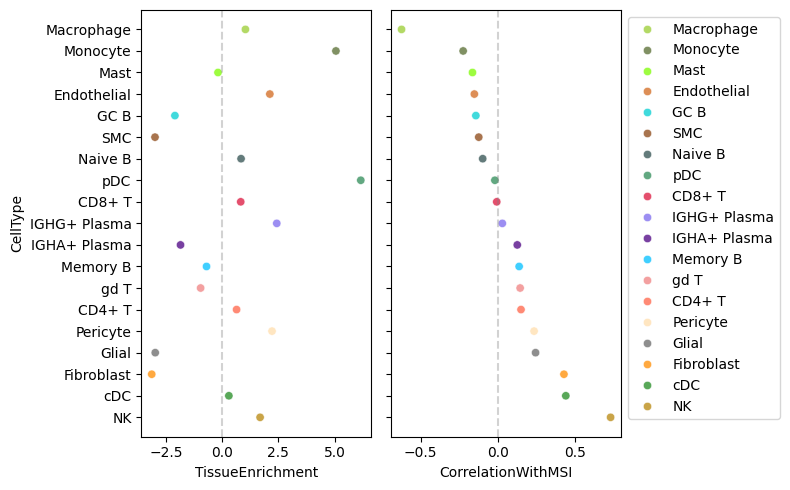

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
# ax = sns.scatterplot(data=SummarizedInfo, x='TissueEnrichment', y='CorrelationWithMSI', hue='CellType', 
#                      alpha=0.75,
#                      # palette=dict_ct_to_color, 
#                      palette=palette_e,
#                      )
ax = sns.scatterplot(data=SummarizedInfo.sort_values('CorrelationWithMSI'), x='TissueEnrichment', y='CellType', hue='CellType', 
                     alpha=0.75,
                     # palette=dict_ct_to_color, 
                     palette=palette_e,
                     legend=None,
                     ax=axes[0]
                     )
axes[0].axvline(0, color='gray', ls='--', alpha=0.35)

ax = sns.scatterplot(data=SummarizedInfo.sort_values('CorrelationWithMSI'), x='CorrelationWithMSI', y='CellType', hue='CellType', 
                     alpha=0.75,
                     # palette=dict_ct_to_color, 
                     palette=palette_e,
                     ax=axes[1]
                     )
axes[1].axvline(0, color='gray', ls='--', alpha=0.35)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='')
fig.tight_layout();

# plt.axhline(0, color='gray', ls='--', alpha=0.35)
# ax.set_ylim([-1, 1]);
# ax.set_xlabel('');
# ax.set_ylabel('');

In [ ]:
SummarizedInfo.

/tmp/ipykernel_124485/1237880459.py:2: UserWarning: The palette list has more values (21) than needed (12), which may not be intended.
  ax = sns.scatterplot(data=SummarizedInfo[(SummarizedInfo['TissueEnrichment']>=0)].sort_values('CorrelationWithMSI', ascending=False).head(20),


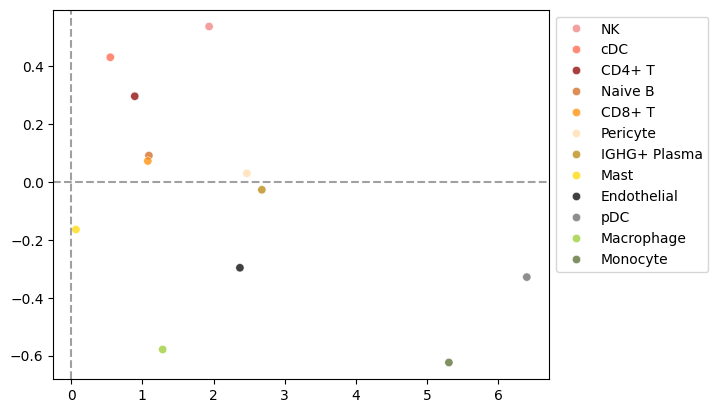

In [270]:
plt.figure(dpi=100)
ax = sns.scatterplot(data=SummarizedInfo[(SummarizedInfo['TissueEnrichment']>=0)].sort_values('CorrelationWithMSI', ascending=False).head(20), 
                     x='TissueEnrichment', y='CorrelationWithMSI', hue='CellType', 
                     # palette=dict_ct_to_color, 
                     palette=palette_e,
                     alpha=0.75,
                     )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='')
plt.axvline(0, color='gray', ls='--', alpha=0.75)
plt.axhline(0, color='gray', ls='--', alpha=0.75)
ax.set_xlabel('');
ax.set_ylabel('');

In [71]:
SummarizedInfo.to_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/4_TME/CellType_MSI_intensity.tsv', sep='\t', index=False)

In [189]:
raise ValueError

ValueError: 

In [ ]:
SummarizedInfo_C = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/4_TME/CellType_MSI_intensity.tsv', sep='\t')
SummarizedInfo_J = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/4_TME/CellType_MSI_intensity.tsv', sep='\t')

# SummarizedInfo_C.columns = [ f'{c}_C' for c in SummarizedInfo_C.columns ]
# SummarizedInfo_J.columns = [ f'{c}_J' for c in SummarizedInfo_J.columns ]

/tmp/ipykernel_124485/2298884052.py:18: UserWarning: The palette list has more values (20) than needed (6), which may not be intended.
  ax = sns.scatterplot(data=SummarizedInfo_concat[(SummarizedInfo_concat['CorrelationWithMSI_C']<0) &


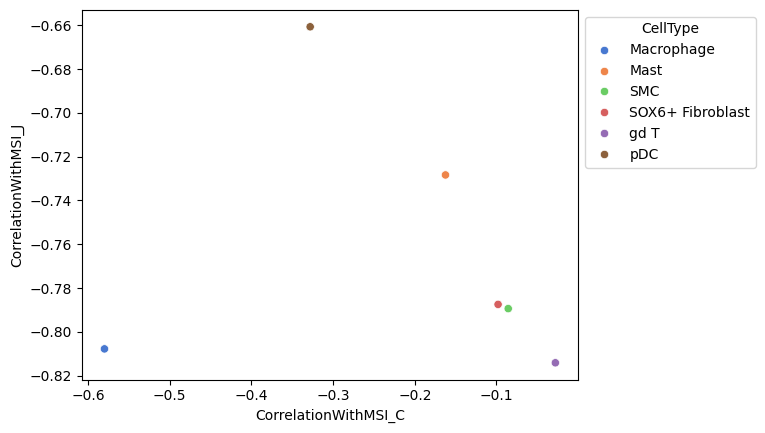

In [ ]:
dict_CellType_to_Info = dict()
for tup in SummarizedInfo_C.itertuples():
    dict_CellType_to_Info[tup.CellType] = [ tup.TissueEnrichment, tup.CorrelationWithMSI, tup.Pvalue, 0, 0, 0 ]
for tup in SummarizedInfo_J.itertuples():
    try:
        dict_CellType_to_Info[tup.CellType][3] = tup.TissueEnrichment
        dict_CellType_to_Info[tup.CellType][4] = tup.CorrelationWithMSI
        dict_CellType_to_Info[tup.CellType][5] = tup.Pvalue
    except KeyError:
        dict_CellType_to_Info[tup.CellType] = [ 0,0,0, tup.TissueEnrichment, tup.CorrelationWithMSI, tup.Pvalue ]

SummarizedInfo_concat = pd.DataFrame(dict_CellType_to_Info,).T
SummarizedInfo_concat.reset_index(inplace=True)
SummarizedInfo_concat.columns = ['CellType', 
                                 'TissueEnrichment_C', 'CorrelationWithMSI_C', 'pvalue_C', 
                                 'TissueEnrichment_J', 'CorrelationWithMSI_J', 'pvalue_J']

ax = sns.scatterplot(data=SummarizedInfo_concat[(SummarizedInfo_concat['CorrelationWithMSI_C']<0) & 
                                                (SummarizedInfo_concat['CorrelationWithMSI_J']<0)], 
                     x='CorrelationWithMSI_C', y='CorrelationWithMSI_J', hue='CellType', 
                     palette=sns.color_palette('muted')+sns.color_palette('bright'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
joanito_patient_order_by_MSI_intensity  = ['CRC2817', 'CRC2783', 'SC035', 'SC044']

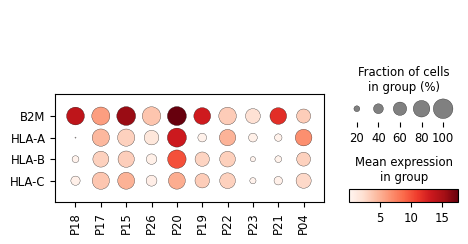

In [ ]:
sc.pl.dotplot(adata_chen[adata_chen.obs['Manual_CellType_lvl_3']=='Tumor cell'], 
              var_names=['B2M', 'HLA-A', 'HLA-B', 'HLA-C'], groupby='PatientID', categories_order=chen_patient_order_by_MSI_intensity, swap_axes=True,)

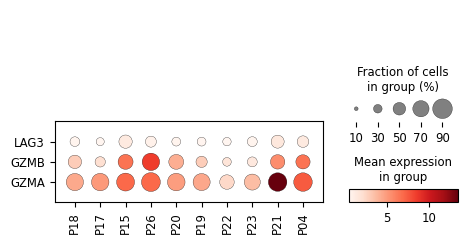

In [ ]:
sc.pl.dotplot(adata_chen[adata_chen.obs['Manual_CellType_lvl_3']=='CD8+ T'], 
              var_names=['LAG3', 'GZMB', 'GZMA', 'GZM'], groupby='PatientID', categories_order=chen_patient_order_by_MSI_intensity, swap_axes=True,)

<Axes: xlabel='count', ylabel='Author_CellType_lvl_2'>

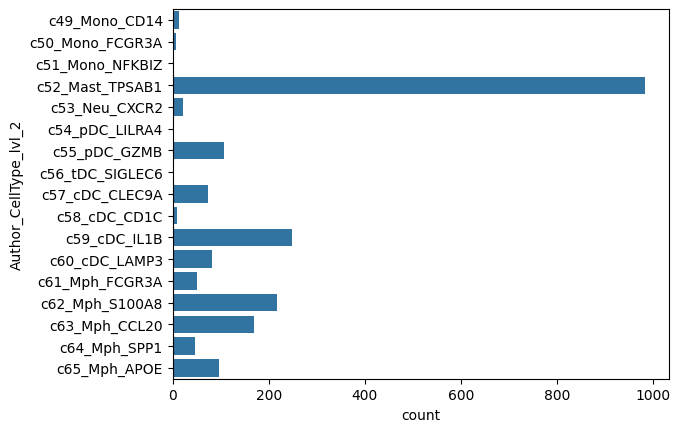

In [ ]:
sns.countplot(data=adata_chen[adata_chen.obs['Author_CellType_lvl_1']=='Mye'].obs, y='Author_CellType_lvl_2', 
               # hue='PatientID', 
              )
# sns.countplot(data=adata_chen[adata_chen.obs['Author_CellType_lvl_1']=='Mye'].obs, y='PatientID', 
#               order=chen_patient_order_by_MSI_intensity, hue='Response'
#               )

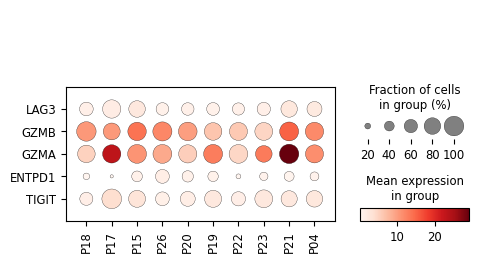

In [ ]:
sc.pl.dotplot(adata_chen[adata_chen.obs['Author_CellType_lvl_2']=='c23_CD8_Tex_LAYN'], 
              var_names=['LAG3', 'GZMB', 'GZMA', 'ENTPD1', 'TIGIT'], groupby='PatientID', 
              categories_order=chen_patient_order_by_MSI_intensity, 
              swap_axes=True,)

<Axes: xlabel='count', ylabel='PatientID'>

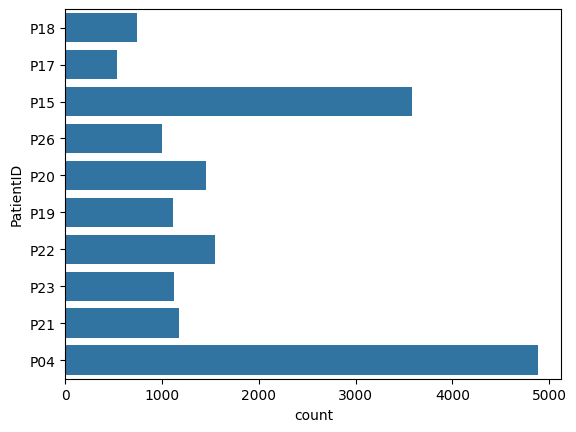

In [ ]:
# sc.pl.umap(adata_chen[adata_chen.obs['Manual_CellType_lvl_3']=='Macrophage'], color=['PatientID'])
sns.countplot(data=adata_chen[adata_chen.obs['Manual_CellType_lvl_3']=='CD4+ T'].obs, y='PatientID', order=chen_patient_order_by_MSI_intensity)